In [27]:
# --- Getting 49 datafiles into Jupyter Lab --- 
import os

col_names = [] 
data_lines = []  

directory = "Comp_data" 

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    if os.path.isfile(file_path) and filename.endswith(".txt"):
        with open(file_path, "r") as myfile:
            for idx, line in enumerate(myfile):
                line = line.strip()  
                if not line: 
                    continue

                split_line = line.split("\t") 

                if idx == 0:
                    col_names = split_line
                else:
                    data_lines.append(split_line)

In [353]:
# --- Importing packages --- 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

In [52]:
# --- Defining dataframe --- 
df = pd.DataFrame(data_lines, columns=col_names)

In [99]:
# --- Defining mutation type --- 
def find_mutation_regex(wild_seq, mutant_seq):
    if wild_seq == mutant_seq:
        return "No mutation"
    elif len(wild_seq) < len(mutant_seq):
        return "Insertion"
    elif len(wild_seq) > len(mutant_seq):
        return "Deletion"
    else: 
        return "Substitution"

In [508]:
# --- Finding mutation type in data ---
df["Mutation_Type"] = [find_mutation_regex(wild, mutant) 
                      for wild, mutant in zip(df["WildType.Sequence"], df["Mutant.Sequence"])]
print(df[["Gene", "Mutation_Type"]])

        Gene Mutation_Type
0   Jtkir5r8      Deletion
1   Cairn3a2  Substitution
3     Fab6l6     Insertion
4       K7c7      Deletion
5        Kl8  Substitution
6     Clach6  Substitution
7     Everr1     Insertion
8     Ist9a7  Substitution
9       App8  Substitution
10    Alli2r     Insertion
11       Ah3  Substitution
12   Jams9r2      Deletion
13   Pear4r9  Substitution
14   Avon1a5  Substitution
15      Ren8      Deletion
16    Try3a8  Substitution
17    Daz2b7  Substitution
18    Fab9r3  Substitution
19   Ever6b6      Deletion
20   Nect1c1      Deletion
21   Emco9b6     Insertion
22   Pear9a7     Insertion
23    Ben3l6     Insertion
24     Ghos8  Substitution
25    Cairn6  Substitution
26      Ist3      Deletion
27      Thxr  Substitution
28    Jok4a3  Substitution
29        K2  Substitution
31   Nect5r3      Deletion
32    Euk4r4     Insertion
33    Peara8  Substitution
34   Gorm6b6  Substitution
35      Bma9     Insertion
37     Urna8      Deletion
38     Alli8  Substitution
3

In [189]:
# --- Finding mutation region --- 
def mutation_region(wild_seq, mutant_seq):
    if wild_seq[:1000] != mutant_seq[:1000]:
        return "Promoter"
    elif wild_seq != mutant_seq:
        return "Coding"
    else:
        return "No mutation"

df["Mutation_Region"] = df.apply(lambda row: mutation_region(row["WildType.Sequence"], row["Mutant.Sequence"]),
    axis=1)
print(df[["Gene", "Mutation_Type", "Mutation_Region"]])

        Gene Mutation_Type Mutation_Region
0   Jtkir5r8      Deletion        Promoter
1   Cairn3a2  Substitution        Promoter
2     Oyu3a9      Deletion        Promoter
3     Fab6l6     Insertion        Promoter
4       K7c7      Deletion        Promoter
5        Kl8  Substitution        Promoter
6     Clach6  Substitution        Promoter
7     Everr1     Insertion        Promoter
8     Ist9a7  Substitution        Promoter
9       App8  Substitution        Promoter
10    Alli2r     Insertion        Promoter
11       Ah3  Substitution        Promoter
12   Jams9r2      Deletion        Promoter
13   Pear4r9  Substitution        Promoter
14   Avon1a5  Substitution        Promoter
15      Ren8      Deletion        Promoter
16    Try3a8  Substitution        Promoter
17    Daz2b7  Substitution        Promoter
18    Fab9r3  Substitution        Promoter
19   Ever6b6      Deletion        Promoter
20   Nect1c1      Deletion        Promoter
21   Emco9b6     Insertion        Promoter
22   Pear9a

In [514]:
# --- Finding mean mRNA expression for WT and mutant strains --- 
df["mRNA_WT_Avg"] = df[[
    "mRNA.Expression.WT.Rep1", 
    "mRNA.Expression.WT.Rep2", 
    "mRNA.Expression.WT.Rep3"
]].astype(float).mean(axis=1)

df["mRNA_Mut_Avg"] = df[[
    "mRNA.Expression.Mut.Rep1", 
    "mRNA.Expression.Mut.Rep2", 
    "mRNA.Expression.Mut.Rep3"
]].astype(float).mean(axis=1)

In [516]:
# --- Finding mean protein expression for WT and mutant strains --- 
df["Protein_Exp_WT_Avg"] = df[[
    "Protein.Expression.WT.Rep1", 
    "Protein.Expression.WT.Rep2", 
    "Protein.Expression.WT.Rep3"
]].astype(float).mean(axis=1)

df["Protein_Exp_Mut_Avg"] = df[[
    "Protein.Expression.Mut.Rep1", 
    "Protein.Expression.Mut.Rep2", 
    "Protein.Expression.Mut.Rep3"
]].astype(float).mean(axis=1)

In [343]:
# --- Finding mean cell viability for WT and mutant strains --- 
df["CellViability_WT_Avg"] = df[[
    "CellViability.WT.Rep1", 
    "CellViability.WT.Rep2", 
    "CellViability.WT.Rep3"
]].astype(float).mean(axis=1)

df["CellViability_Mut_Avg"] = df[[
    "CellViability.Mut.Rep1", 
    "CellViability.Mut.Rep2", 
    "CellViability.Mut.Rep3"
]].astype(float).mean(axis=1)

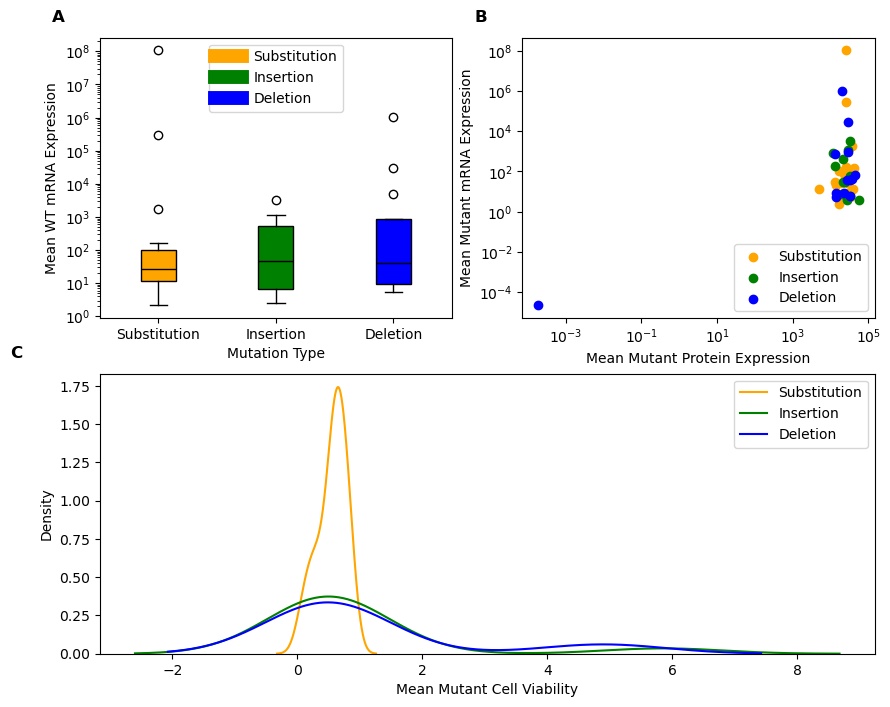

In [510]:
# --- Creating mosaic plot --- 
fig, ax = plt.subplot_mosaic([["box", "scatter"], ["kde", "kde"]], figsize=(10, 8))

group_labels = ["Substitution", "Insertion", "Deletion"]
colors = ["orange", "green", "blue"]

#boxplot
box_data = [df[df["Mutation_Type"] == label]["mRNA_Exp_WT_Avg"] for label in group_labels]
bp = ax["box"].boxplot(box_data, tick_labels=group_labels, patch_artist=True)

for patch, color in zip(bp["boxes"], colors): patch.set_facecolor(color)
for item in bp["medians"]: item.set_color("black")

legend = [plt.Line2D([0], [0], color=c, lw=10, label=l) for c, l in zip(colors, group_labels)]
ax["box"].legend(handles=legend, loc="upper center")
ax["box"].set_xlabel("Mutation Type")
ax["box"].set_ylabel("Mean WT mRNA Expression")
ax["box"].set_yscale("log")

ax["box"].text(-0.1, 1.1, "A", transform=ax["box"].transAxes,
               fontsize=12, fontweight='bold', va='top', ha='right')

#scatterplot 
for mutation, color in zip(group_labels, colors):
    subset = df[df["Mutation_Type"] == mutation]
    ax["scatter"].scatter(
        subset["Protein_Exp_Mut_Avg"],
        subset["mRNA_Exp_Mut_Avg"],
        label=mutation,
        color=color)
    
ax["scatter"].set_xlabel("Mean Mutant Protein Expression")
ax["scatter"].set_ylabel("Mean Mutant mRNA Expression")
ax["scatter"].set_xscale("log")
ax["scatter"].set_yscale("log")
ax["scatter"].legend(loc="lower right")

ax["scatter"].text(-0.1, 1.1, "B", transform=ax["scatter"].transAxes,
                   fontsize=12, fontweight='bold', va='top', ha='right')

#KD plot 
for mutation, color in zip(group_labels, colors):
    subset = df[df["Mutation_Type"] == mutation]["CellViability_Mut_Avg"]
    if len(subset) > 1:
        subset.plot(kind="kde", ax=ax["kde"], label=mutation, color=color)

ax["kde"].set_xlabel("Mean Mutant Cell Viability")
ax["kde"].set_ylabel("Density")
ax["kde"].legend()
ax["kde"].set_ylim(bottom=0)
ax["kde"].text(-0.1, 1.1, "C", transform=ax["kde"].transAxes,
               fontsize=12, fontweight='bold', va='top', ha='right')
plt.show()

In [483]:
# ---- Calculating log2FC ---- 
df = df[
    (df["mRNA_Exp_WT_Avg"] > 0) &
    (df["mRNA_Exp_Mut_Avg"] > 0) &
    (df["Protein_Exp_WT_Avg"] > 0) &
    (df["Protein_Exp_Mut_Avg"] > 0) &
    (df["CellViability_WT_Avg"] > 0) &
    (df["CellViability_Mut_Avg"] > 0)].copy()

df["log2FC_mRNA"] = np.log2(df["mRNA_Exp_Mut_Avg"] / df["mRNA_Exp_WT_Avg"])
df["log2FC_protein"] = np.log2(df["Protein_Exp_Mut_Avg"] / df["Protein_Exp_WT_Avg"])
df["log2FC_viability"] = np.log2(df["CellViability_Mut_Avg"] / df["CellViability_WT_Avg"])

In [489]:
# ---- Creating a composite score of log2FC ---- 
df["composite_score"] = (df["log2FC_mRNA"] + df["log2FC_protein"] + df["log2FC_viability"])
top5_genes = df.sort_values("composite_score", ascending=False).head(5)

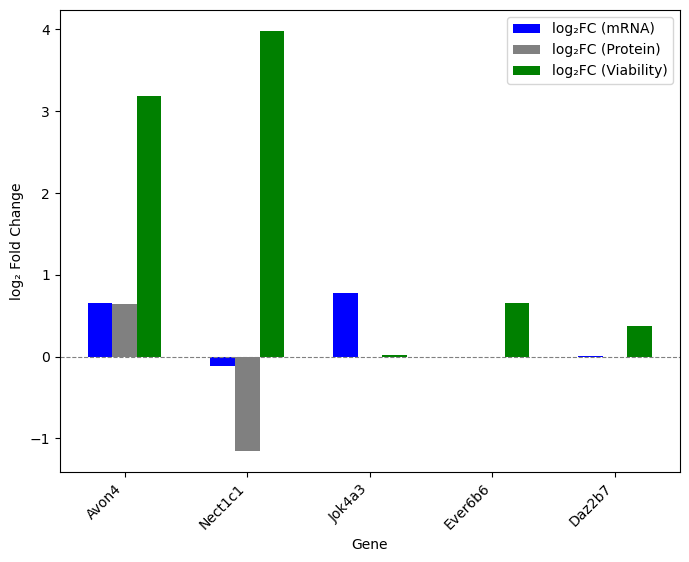

In [544]:
# --- Creating a Grouped barplot based on log2FC for top 5 genes --- 
top_genes = df.sort_values("composite_score", ascending=False).head(5)

metrics = ["log2FC_mRNA", "log2FC_protein", "log2FC_viability"]
labels = ["log₂FC (mRNA)", "log₂FC (Protein)", "log₂FC (Viability)"]
colors = ["blue", "gray", "green"]

x = np.arange(len(top_genes))  
width = 0.2  

fig, ax = plt.subplots(figsize=(8, 6))
for i, (metric, label, color) in enumerate(zip(metrics, labels, colors)):
    ax.bar(x + i*width - width, top_genes[metric], width, label=label, color=color)

ax.set_xticks(x)
ax.set_xticklabels(top_genes["Gene"], rotation=45, ha="right")
ax.set_ylabel("log₂ Fold Change")
ax.set_xlabel("Gene")
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.legend()
plt.show()

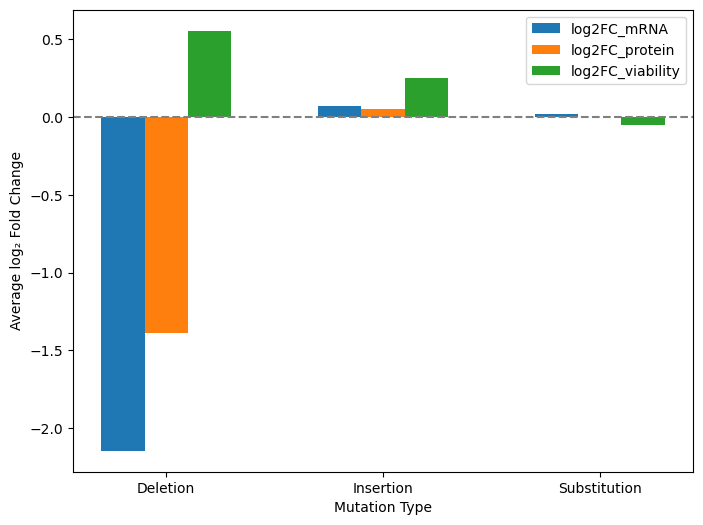

In [540]:
# --- Created a Bar plot for effect of mutation type on expression & viability based on log2 fold change ---  
grouped_means = df.groupby("Mutation_Type")[["log2FC_mRNA", "log2FC_protein", "log2FC_viability"]].mean()

mutation_types = grouped_means.index.tolist()
metrics = grouped_means.columns.tolist()
values = grouped_means.values.T 

x = np.arange(len(mutation_types))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width, values[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(mutation_types)
ax.set_xlabel("Mutation Type")
ax.set_ylabel("Average log₂ Fold Change")
ax.axhline(0, linestyle="--", color="gray")
ax.legend()
plt.show()